Dans ce notebook je récupère une liste de chocs Tore Supra obtenue avec Ged. 

Pour chacun de ces chocs, je récupère les signaux de puissance FCI, et j'en déduis la puissance couplée max et la durée de la puissance RF max. L'objectif est de réaliser une mini base de données des performances du système FCI de Tore Supra.

# Tore Supra database

In [10]:
from pywed import * # Tore Supra database library
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [238]:
pulse_list = np.loadtxt('data/liste_choc_fci.txt', dtype=int)

In [290]:
pulse_list = np.arange(44092, 48311, dtype='int')


In [291]:
ts_max_power = []
ts_max_duration = []

for pulse in pulse_list:
    #print('Retrieve date for pulse {}'.format(pulse))
    # retrieve ICRH power from Tore Supra database
    try: 
        data = tsbase(int(pulse), 'GPUIFCI')   
        
        # Check the case when power is alway nul during shot 
        non_zero_values = np.squeeze(np.nonzero(data[0][:,3]))       
        if non_zero_values.size>1:      
            # Max power in MW, addition of all launchers 
            # (4th columns of Gpuifci power signal)
            ts_max_power.append(np.max(data[0][:,3], axis=0))

            # Max duration : take the max power 
            # and calculates the time duration btw first and last non-zero values
        
            t_start = data[1][non_zero_values[0],0]
            t_end  = data[1][non_zero_values[-1],0]
            t_duration = t_end - t_start
            ts_max_duration.append(t_duration)
    except PyWEDException:
        pass
        #print('no data')


You're asking a lot of data, please wait
You're asking a lot of data, please wait
You're asking a lot of data, please wait
You're asking a lot of data, please wait
You're asking a lot of data, please wait
You're asking a lot of data, please wait
You're asking a lot of data, please wait
You're asking a lot of data, please wait
You're asking a lot of data, please wait
You're asking a lot of data, please wait
You're asking a lot of data, please wait
You're asking a lot of data, please wait
You're asking a lot of data, please wait
You're asking a lot of data, please wait
You're asking a lot of data, please wait
You're asking a lot of data, please wait
You're asking a lot of data, please wait
You're asking a lot of data, please wait
You're asking a lot of data, please wait
You're asking a lot of data, please wait
You're asking a lot of data, please wait
You're asking a lot of data, please wait
You're asking a lot of data, please wait
You're asking a lot of data, please wait
You're asking a 

In [294]:
pulse

48310

In [295]:
np.save('TS_data_44092-48310.npy', np.vstack([np.array(ts_max_power), np.array(ts_max_duration)]))

In [303]:
ts_data_35000_44091.shape

(2, 2748)

In [16]:
ts_data_35000_44091 = np.load('TS_data_35000-44092.npy')
ts_data_44092_48310 = np.load('TS_data_44092-48310.npy') 
ts_max_power = np.concatenate((ts_data_35000_44091[0,:],ts_data_44092_48310[0,:]))
ts_max_duration = np.concatenate((ts_data_35000_44091[1,:],ts_data_44092_48310[1,:]))     

(array([  0.,   2.,   4.,   6.,   8.,  10.]),
 <a list of 6 Text xticklabel objects>)

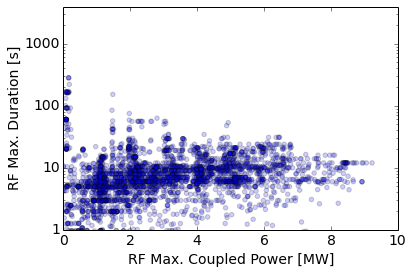

In [317]:
scatter(ts_max_power, ts_max_duration, alpha=0.2)
ylim(1,1.1*60*60)
xlim(0,10)
xlabel('RF Max. Coupled Power [MW]', fontsize=14)
ylabel('RF Max. Duration [s]', fontsize=14)
yscale('log')
yticks([1, 10, 100, 1000], ['1', '10', '100', '1000'], fontsize=14)
xticks(fontsize=14)

# JET database

In [6]:
import MDSplus as mds

In [7]:
conx = mds.Connection('mdsplus.jet.efda.org')
print(conx.hostspec)

mdsplus.jet.efda.org


In [8]:
jet_pulse_list = [68752, 68809, 68110, 65947, 78069, 73520,77894,78125,77404,78070,77293,76721,76722]

jet_pulse_list = range(68955, 76723) # CW
jet_pulse_list = range(80000, 87944) # ILW

In [ ]:
jet_max_power = []
jet_max_duration = []

for pulse in jet_pulse_list:
    try:
        y = np.array(conx.get('_sig=jet("ppf/icrh/ptot", '+str(pulse)+')')) / 1e6 # total ICRH power in MW
        t = np.array(conx.get('dim_of(_sig)')) # time vector

        non_zero_values = np.squeeze(np.nonzero(y))
        
        # continue only if the y vector is not 0 
        if non_zero_values.size:
            jet_max_power.append(np.max(y))
                
            t_start = t[non_zero_values[0]]
            t_end  = t[non_zero_values[-1]]
            t_duration = t_end - t_start
            jet_max_duration.append(t_duration)
    except KeyError :
        pass#print('no data')
        
np.save('JET_power_ILW.npy', np.array(jet_max_power))
np.save('JET_duration_ILW.npy', np.array(jet_max_duration))

In [234]:
JET_max_power = np.load('JET_power_ILW.npy')

In [235]:
JET_max_power.size

3407

# LHD

In [12]:
# references
# Seki 2013
# Kasahara 2010 _Study of High power ICRF antenna design in LHD
lhd_power = [0.55, 0.52, 0.23, 0.49, 0.24, 0.7, 0.9, 0.4, 3, 3.5]
lhd_duration = [1*60*60, 0.5*60*60, 1*60*60, 0.5*60*60, 1*60*60, 1135, 48*60, 54*60, 10, 10]

#EAST

In [13]:
# references:
# B.Wan NF 2013
# Y.P.Zhao FED 2014
east_power = [0.6, 1.6, 2, 0.8]
east_duration = [5, 6, 4, 30]

#Plot

In [14]:
import matplotlib as mpl

#To make sure we have always the same matplotlib settings
#(the ones in comments are the ipython notebook settings)

#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
#mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
#mpl.rcParams['figure.subplot.bottom']=.1    #.125

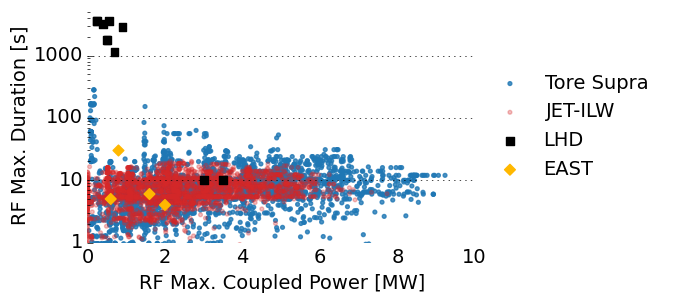

In [26]:
jet_max_power = np.load('JET_power_ILW.npy')
jet_max_duration = np.load('JET_duration_ILW.npy')
                           
scatter(ts_max_power, ts_max_duration, marker='.', s=30, color=(31/255, 119/255, 180/255), alpha=0.8)
scatter(jet_max_power, jet_max_duration, marker='.', s=30, color=(214/255, 39/255, 40/255), alpha=0.3)
scatter(lhd_power, lhd_duration, s=30, marker='s', color='k')
scatter(east_power, east_duration, marker='D', s=30, color='#FFB800')
ylim(1,1.5*60*60)
xlim(0,10)
xlabel('RF Max. Coupled Power [MW]', fontsize=14)
ylabel('RF Max. Duration [s]', fontsize=14)
yscale('log')
yticks([1, 10, 100, 1000], ['1', '10', '100', '1000'], fontsize=14)
xticks(fontsize=14)
grid(True, axis='y')

# Put a legend to the right of the current axis
lgd = legend(('Tore Supra', 'JET-ILW', 'LHD', 'EAST'), loc=5, bbox_to_anchor=(1.02, 0, 0.5, 1), 
           ncol=1, mode="expand", borderaxespad=0., frameon=False, fontsize=14, scatterpoints=1)

# Remove the plot frame lines. They are unnecessary chartjunk. 
gca().spines["top"].set_visible(False)  
gca().spines["bottom"].set_visible(False)  
gca().spines["right"].set_visible(False)  
gca().spines["left"].set_visible(False)  
# Ensure that the axis ticks only show up on the bottom and left of the plot.  
# Ticks on the right and top of the plot are generally unnecessary chartjunk.  
gca().get_xaxis().tick_bottom()  
gca().get_yaxis().tick_left()  
# Remove the tick marks; they are unnecessary with the tick lines we just plotted.  
tick_params(axis="x", which="both", bottom="off", top="off",  
                labelbottom="on", left="off", right="off", labelleft="on")  

gcf().set_size_inches(5,3)
savefig('ICRF_Power-vs-duration.png', dpi=120, bbox_inches='tight', pad_inches=0)